# Image Analysis

**notebook lecture 15 Python Programming in Earth Science**

Learning Objectives

- Look at contouring and hillshading
- learn about the use of photos and images as gridded / raster data
- learn about RGB color scale
- an example of quantifying different colors on time-lapse imagery
- an example of quantifying size-distributions from grainsize data

## Examples of gridded earth science data types

- Satellite images
- Digital photographs
- Interpolated data sets
- Digital elevation models (DEMs)
- Output from simulation models


## A Geoscience Example for Imagery: Time-lapse Camera Data

Geomorphologists use time-lapse cameras for a variety of purposes: to watch coastal erosion, to look at river braidplain wetness, to look at gullying and debris flow processes in post-fire landscapes.


We had time-lapse cameras installed in the Calwood fire area, and found they recorded how the vegetation recovered post-fire, over the summer period. We will explore a bit how we went about this excercise.



## Images consist of Raster Data

Photos or digital images are generally represented as **raster** data, that is, as a 2D or 3D array of color intensities. <br>

Images are everywhere in the earth sciences. We heard about the use of aerial photos and satellite images to identify lithologic units, tectonic structures,
landslides, and other features within a study area. Drone imagery and time-lapse camera images are another source of data on geological and landscape processes.

Moreover, a great variety of image processing methods are used to analyze
images from thin sections or from grain size photos, to automatically identify objects.

Raster data are stored as 2D or 3D arrays. The elements of these arrays represent
variables.In the case of the DEM that you worked with earlier, the array elements represent altitude of a grid point above sea level. 

In the case of an color image the elements store **color intensity** values as a a stack of 2D arrays, preserving the relative contribution of Red, Green and Blue colors. The 2D arrays  are sometimes referred to as *channels*. 

Note that in many of the common image storage formats: JPG, TIFF or PNG there may also be an additional fourth *channel*, it stores a value for transparancy. 
In all of the following codes, we work with images of just RGB and have saved them without preserving the transparancy. This may require you to export an image one additional time and explicitly save it without the alpha numeric for transparancy.


### RGB Color Scale

RGB stands for Red, Green, Blue. The color scale constructs all colors from a combination of the three primary colors. The red, green and blue use 8 bits each, which have integer values from 0 to 256. <br>

This makes 256 * 256 * 256 = 16,777,216 possible colors.

Note in the figure that there is also a Hex code. 
This is just a different notation of the same RGB combination. The hexidecimal notation  is easier to read than the binary representation, it has a # and a combination of letters and numbers for each color. This is commonly used in HTML code (on the web).

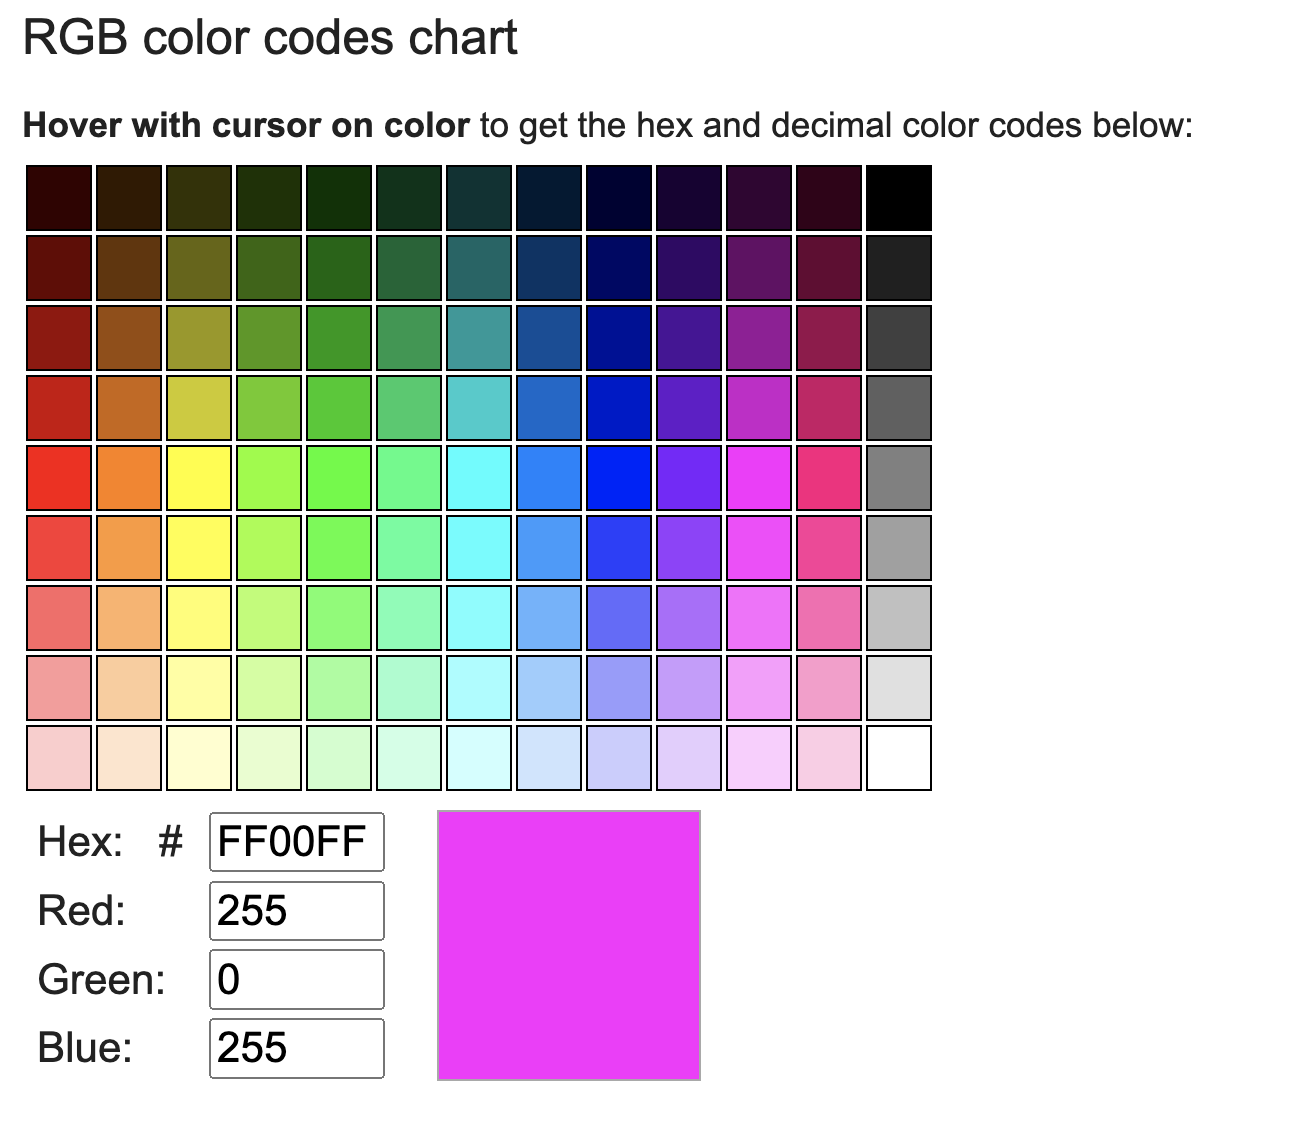

* Image Courtesy: https://www.rapidtables.com/web/color/RGB_Color.html

## Install packages


In [ ]:
# We have these packages pre-installed for you on the Open EarthScape Image Analysis kernel
# pip install opencv-python scikit-learn numpy matplotlib scikit-image webcolors


In [ ]:
# import packages for Image Analysis

from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
from webcolors import hex_to_name
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Convert an RGB color into Hex color format. 

In [ ]:
# Function to convert an RGB color into Hex color format. 
# This function will help at the end when visualizing the results of our analysis.
# Instead of having 3 diff values (red, green, blue), we will have 1 output: hex value.

def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [ ]:
# Performs preprocessing of the image. 
# Makes changes to picture before analyzing colors.
# Resize and reshape the image in this step. 
# Resizing is optional, but reshaping is needed for the color analysis model to work.

def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

## Color analysis function 

1. We do not want to learn about all colors! Instead, we cluster the top colors. This is done by using the k_means method. Inside the function we are passing the value of how many clusters do we want to divide. After clustering we predict the colors that weigh the most — meaning getting the most area on the image.

2. Secondly, we are calling the Counter function. Counter creates a container to the elements as dictionary keys, and their volume is stored as dictionary values. As you recall, dictionaries store data in key: value pairs. So when you pass in the “key,” you can “value” as a return. We are ordering the colors according to the keys.

3. Thirdly, we are passing those colors in the rgb_to_hex function so that we can get the hex values of the colors.

4. And lastly, the visualization of the result. I decided to go with a pie chart, which will be helpful to understand the weight of each color in the whole picture. 


In [ ]:
def color_analysis(img):
    clf = KMeans(n_clusters = 10)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors, autopct='%1.1f%%', shadow=True, startangle=90)
    print(hex_colors)


##### a bit more on the k-means clustering methods
https://scikit-learn.org/stable/modules/clustering.html


## Using these functions for time-lapse data from Central Gulch and Heil Ranch in the Calwood fire

In Central Gulch short grassy vegetation grew back rapidly, we here do the an analysis on a September view in that area. 

In [ ]:
# Use imread method by OpenCV to read the Test image. 
# Then, convert the color format from BGR to RGB using cvtColor. 
# The everyday images that we see on our devices are in RGB format.

Test=cv2.imread('DSCF0546.JPG')
Test=cv2.cvtColor(Test, cv2.COLOR_BGR2RGB)
plt.imshow(Test)
plt.show()

In [ ]:
# Earlier we defined the image and assigned to the “image” variable. 
# Call the prep_image function to preprocess the image.

modified_image = prep_image(Test)
color_analysis(modified_image)

### Time-lapse Camera watching a gully side slope at Heil Ranch

In [ ]:
# Use imread method by OpenCV to read the image. 
# Then, convert the color format from BGR to RGB using cvtColor. 
# The everyday images that we see on our devices are in RGB format.

July24 = cv2.imread('July24.jpg')
July24 = cv2.cvtColor(July24, cv2.COLOR_BGR2RGB)
plt.imshow(July24)
plt.show()

In [ ]:

# Call the prep_image function to preprocess the image.
# Then do the color analysis

modified_image = prep_image(July24)
color_analysis(modified_image)

## <div style="color:green">In-class practice</div>

Now we are interested in how  the vegetation for the second camera view changed over the summer-fall season?

Can you do the steps of the color analysis for the Oct 8th image?
How different does the hex color distribution look from the June 24th image? 


## <div style="color:green">In-class practice</div>

Change the number of clusters to 5, and redo the analysis for both images. 
Discuss with your neighbor how you would now have to make decisions on how to classify vegetation?



In [ ]:
def color_analysis2(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors, autopct='%1.1f%%', shadow=True, startangle=90)
    print(hex_colors)


In [ ]:
# 
modified_image = prep_image(July24)
color_analysis2(modified_image)

## Quantifying size distributions from imagery

Particle identification and quantification of their sizes in an image are a classic applications of image analysis. Examples from the geosciences include grain size analysis, or determining the mineral composition of rocks from thin sections. 

Particle size analysis aims to identify individual particles, to measure their respective sizes, and then to count the number of particles per size class, so that you will have a size-distribution. 

Our example applies this technique on icebergs in a fjord in West-Greenland.

I have re-used code from M.Trauth, 2022, Python Recipes for Earth Sciences.

In [ ]:
# using the modules cv2, scipy and skimage again

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import color
from skimage import exposure
from skimage import io
from skimage import feature
from skimage import measure
from skimage import segmentation

In [ ]:
I1 = io.imread('IcebergsTorsukattuak06012014.png')

#let's see how many pixels and how many channels are in this image

imagedims=np.shape(I1)
print('image shape is ', np.shape(I1))

# in this case I knew this image has a 3km long coverage in its longest axis
# to scale to 'real dimensions' you will need to know the actual scale of your photo.

pixel_resolution=3000/1838
print('pixel_resolution in m is', np.round(pixel_resolution, 2))


print('image length in m',np.round(imagedims[1]*pixel_resolution,2))
print('image width in m', np.round(imagedims[0]*pixel_resolution,2))   

In [ ]:

ix = imagedims[1]
iy = imagedims[0]

plt.figure()
io.imshow(I1,extent=[0,ix,0,iy])
plt.title('Original image')
plt.axis('off')
plt.show()

In [ ]:
I2 = color.rgb2gray(I1)
plt.figure()
io.imshow(I2,
extent=[0,ix,0,iy])
plt.title('Grayscale image')
plt.axis('off')
plt.show()

In [ ]:
I3 = exposure.rescale_intensity(I2,out_range='uint8')
plt.figure()
io.imshow(I3,extent=[0,ix,0,iy])
plt.title('Adjusted intensity values')
plt.axis('off')
plt.show()

In [ ]:
#The function threshold() converts the background-free image to a binary
#image via thresholding. 

# If the threshold is 0, the image is all white.
# If the threshold is 255, the image is all black. 

# Thresholding is a bit arbitrary depending on your image colors.
# I played around a few times and picked 125 as a threshold

thresh,I4 = cv2.threshold(I3,125,255,cv2.THRESH_BINARY)
plt.figure()
io.imshow(I4,
extent=[0,ix,0,iy])
plt.title('Binary image')
plt.axis('off')
plt.show()

 ## <font color = green> IN-CLASS PRACTICE </font> 


In [ ]:
# change the threshold and see what is the effect on the binary map


# do you note places where the binary image seems to misidentify certain iceberg features?


### Identifying and counting objects 

One approach that is commonly used to identify and count objects
in an image is region-based segmentation, using the *watershed segmentation
algorithm*.

The way to think about this algorithm: Watersheds in a landscape are hydrologically contained areas that are separated by ridges from another. Watershed segmentation
applies the same methods to grayscale images that are used to separate
catchments in digital elevation models: the grayscale values are
interpreted as 'elevation' in a digital elevation model and the watershed then
separates the two objects of interest. 

To identify pixels that belong to a particular object we use the *nearest neighbor distance*. We use the distance transform performed by `distance_transform_edt()`, which assigns to each pixel a number that is the distance between the pixel and the nearest non-zero pixel in I4.




In [ ]:
distance = ndi.distance_transform_edt(I4)

# use the distance to create a mask
coords = feature.peak_local_max(distance,footprint=np.ones((15,15)),labels=I4)
mask = np.zeros(distance.shape,dtype=bool)
mask[tuple(coords.T)] = True
markers,_ = ndi.label(mask)

In [ ]:
L = segmentation.watershed(-distance,markers,mask=I4)
plt.figure()
io.imshow(color.label2rgb(L,bg_label=0),
extent=[0,ix,0,iy])
plt.title('Watershed segmentation')
plt.axis('off')
plt.show()

In [ ]:
print(np.max(L))
graindata = measure.regionprops(L)
grainareas = np.zeros(np.max(L))
for i in range(0,np.max(L)):
    grainareas[i] = graindata[i].area

In [ ]:
#We then scale the object sizes such that the area of one pixel is (3000 m/1867 pixels)^2

objectareas = 3000**2*grainareas*1837**(-2)
#objectareas = (pixel_resolution**2) * grainareas

max_area = np.max(objectareas)
min_area = np.min(objectareas)
mean_area = np.mean(objectareas)
sum_area=np.sum(objectareas)

print('Maximum Iceberg area = ', max_area, 'in m^2')
print('Minimum Iceberg area = ', min_area, 'in m^2')
print('Mean Iceberg area = ', mean_area, 'in m^2')
print('Total Iceberg area = ', (sum_area/(1000*1000)), 'in km^2')


In [ ]:
# plot the histogram of the iceberg size distribution

#clf
#e = [0, 0.0005, 0.15]
plt.hist(objectareas, 100)
plt.xlabel('Iceberg Size')
plt.ylabel('Number of Icebergs')
#plt.axis([0, 0.1, 0, 3000])

In [ ]:
## <font color = green> IN-CLASS PRACTICE </font> 


In [ ]:
# how about we are not so interested in the number and size of he icebergs, but instead we are interested in how many dirty icebergs are floating in a certain area?

# use the codes provided above to see whether you can identify dirty icebergs. 


In [ ]:
I5 = io.imread('icebergtest.tiff')


#let's see how many pixels and how many channels are in this image

imagedims=np.shape(I5)
print('image shape is ', np.shape(I5))

# in this case I knew this image has a 3km long coverage in its longest axis
# to scale to 'real dimensions' you will need to know the actual scale of your photo.

pixel_resolution=3000/1838
print('pixel_resolution in m is', np.round(pixel_resolution, 2))


print('image length in m',np.round(imagedims[1]*pixel_resolution,2))
print('image width in m', np.round(imagedims[0]*pixel_resolution,2))  

ix = imagedims[1]
iy = imagedims[0]

plt.figure()
io.imshow(I5,extent=[0,ix,0,iy])
plt.title('Original image')
plt.axis('off')
plt.show()



In [ ]:
I6 = color.rgb2gray(I5)
plt.figure()
io.imshow(I6,extent=[0,ix,0,iy])
plt.title('Grayscale image')
plt.axis('off')
plt.show()

In [ ]:
I7 = exposure.rescale_intensity(I6,out_range='uint8')
plt.figure()
io.imshow(I7,extent=[0,ix,0,iy])
plt.title('Adjusted intensity values')
plt.axis('off')
plt.show()

In [ ]:
thresh,I8 = cv2.threshold(I7,100,255,cv2.THRESH_BINARY)
plt.figure()
io.imshow(I8,
extent=[0,ix,0,iy])
plt.title('Binary image')
plt.axis('off')
plt.show()

In [ ]:
### Starting Point for scikit-image

https://scikit-image.org/